importing necessary library

In [ ]:
import tensorflow
import numpy as np
import pandas as pd
import os,sys
from keras import models
from tensorflow.keras.models import Model

import re

from absl import logging
from tensorflow.keras import layers
import glob
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import cv2

Using TensorFlow backend.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import layers, models, optimizers
from keras import backend as K

upload the required files

In [ ]:
from google.colab import files
up=files.upload()

Saving d4.zip to d4.zip


In [ ]:
!unzip d4.zip 

Streaming output truncated to the last 5000 lines.
  inflating: d4/Train/survived/8913_idx5_x2451_y451_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2451_y501_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2451_y51_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2451_y551_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2451_y601_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2451_y651_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2451_y701_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2501_y101_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2501_y151_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2501_y1751_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2501_y1801_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2501_y1851_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2501_y1901_class0.png  
  inflating: d4/Train/survived/8913_idx5_x2501_y1_class0.png  
  inflating: d4/Train/survived/8913_id

setting path

In [ ]:
base = 'd4'
train=os.path.join(base,"Train")
test=os.path.join(base,"Test")
valid=os.path.join(base,"Valid")
print(train,test,valid)
print(len(os.listdir(train)))
print(len(os.listdir(valid)))
print(len(os.listdir(test)))

d4/Train d4/Test d4/Valid
2
2
36


In [ ]:
train_survived_dir = os.path.join(train, 'survived')
train_death_dir = os.path.join(train, 'death')

valid_survived_dir = os.path.join(train, 'survived')
valid_death_dir = os.path.join(train, 'death')

test_survived_dir = os.path.join(train, 'survived')
test_death_dir = os.path.join(train, 'death')
#File Name Checking
train_survived_dir_fnames = os.listdir(train_survived_dir)
print(train_survived_dir_fnames[:10])

train_death_dir_fnames = os.listdir(train_death_dir)
print(train_death_dir_fnames[:10])

test_img_dir_fnames = os.listdir(test)
print(test_img_dir_fnames[:10])

['8913_idx5_x2401_y1751_class0.png', '8917_idx5_x1451_y1151_class0.png', '8867_idx5_x1451_y951_class0.png', '8867_idx5_x1451_y1851_class0.png', '8865_idx5_x1251_y501_class0.png', '8917_idx5_x1351_y951_class0.png', '8863_idx5_x2401_y1751_class0.png', '8914_idx5_x2151_y1051_class0.png', '8867_idx5_x1151_y1851_class0.png', '8867_idx5_x2201_y1301_class0.png']
['8863_idx5_x1601_y1251_class1.png', '8867_idx5_x901_y1301_class1.png', '8917_idx5_x1501_y351_class1.png', '8916_idx5_x901_y101_class1.png', '8864_idx5_x2201_y2451_class1.png', '8916_idx5_x501_y351_class1.png', '8917_idx5_x1351_y901_class1.png', '8917_idx5_x1251_y451_class1.png', '8864_idx5_x1451_y2601_class1.png', '8917_idx5_x851_y251_class1.png']
['a23.png', 'a9.png', 'a18.png', 'a27.png', 'a29.png', 'a12.png', 'a35.png', 'a32.png', 'a19.png', 'a6.png']


plotting and understanding dataset

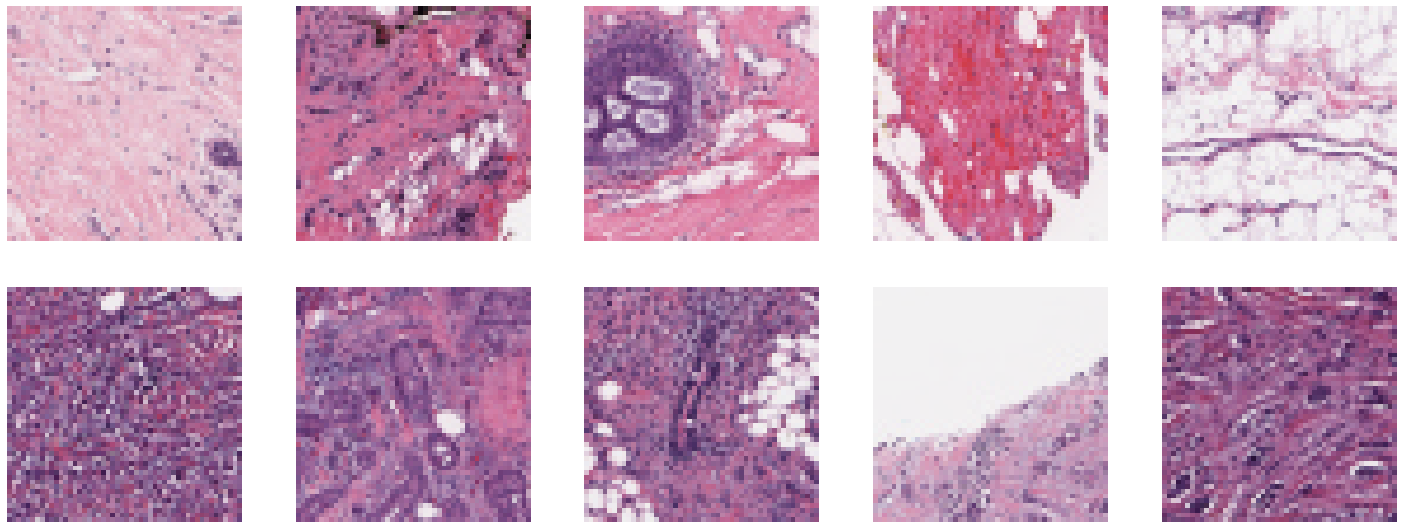

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0


fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 5
next_survived_pix = [os.path.join(train_survived_dir, fname) 
                for fname in train_survived_dir_fnames[pic_index-5:pic_index]]

next_death_pix = [os.path.join(train_death_dir, fname) 
                for fname in train_death_dir_fnames[pic_index-5:pic_index]]



for i, img_path in enumerate(next_survived_pix+next_death_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# the three color channels: R, G, and B
img_input = layers.Input(shape=(50, 50, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer and then dropout is used
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x=Dropout(0.2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer and then dropout is used
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x=Dropout(0.2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer and then dropout is used
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x=Dropout(0.2)(x)

# Fourth convolution extracts 128 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x=Dropout(0.2)(x)

#As our model is multi class classification thus we will use softmax activation

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
#for 2 classes use sigmoid
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0     

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train,  # This is the source directory for training images
        target_size=(50, 50),  # All images will be resized to 50x50
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        valid,
        target_size=(50, 50),
        batch_size=20,
        class_mode='binary')

Found 7651 images belonging to 2 classes.
Found 2957 images belonging to 2 classes.


In [ ]:
#complie
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:

#fit the model
#Training the Model

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,  
      epochs=25,
      validation_data=validation_generator,
      validation_steps=40,  
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
200/200 - 12s - loss: 0.3941 - accuracy: 0.8282 - val_loss: 0.3786 - val_accuracy: 0.8637
Epoch 2/25
200/200 - 11s - loss: 0.3031 - accuracy: 0.8790 - val_loss: 0.5344 - val_accuracy: 0.8788
Epoch 3/25
200/200 - 11s - loss: 0.3004 - accuracy: 0.8798 - val_loss: 0.5710 - val_accuracy: 0.7825
Epoch 4/25
200/200 - 11s - loss: 0.3095 - accuracy: 0.8755 - val_loss: 0.5872 - val_accuracy: 0.7955
Epoch 5/25
200/200 - 11s - loss: 0.2970 - accuracy: 0.8765 - val_loss: 0.4380 - val_accuracy: 0.8525
Epoch 6/25
200/200 - 11s - loss: 0.2880 - accuracy: 0.8905 - val_loss: 0.3999 - val_accuracy: 0.8700
Epoch 7/25
200/200 - 11s - loss: 0.3108 - accuracy: 0.8792 - val_loss: 0.4029 - val_accuracy: 0.8788
Epoch 8/25
200/200 - 11s - loss: 0.2732 - accuracy: 0.8950 - val_loss: 0.5523 - val_accuracy: 0.7917
Epoch 9/25
200/200 - 11s - loss: 0.2768 - accuracy: 0.8925 - val_loss: 0.5008 - val_accuracy: 0.8600
Epoch 10/25
200

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#complie
model1=model
model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history1 = model.fit_generator(
      train_generator,
      steps_per_epoch=200,  # 2000 images = batch_size * steps
      epochs=25,
      validation_data=validation_generator,
      validation_steps=40,  # 1000 images = batch_size * steps
      verbose=2)
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : rmsprop', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

Epoch 1/25
200/200 - 12s - loss: 0.2806 - accuracy: 0.8980 - val_loss: 0.3844 - val_accuracy: 0.8469
Epoch 2/25
200/200 - 11s - loss: 0.2590 - accuracy: 0.8955 - val_loss: 0.3186 - val_accuracy: 0.8662
Epoch 3/25
200/200 - 11s - loss: 0.2554 - accuracy: 0.8963 - val_loss: 0.2920 - val_accuracy: 0.8838
Epoch 4/25
200/200 - 11s - loss: 0.2500 - accuracy: 0.8968 - val_loss: 0.3040 - val_accuracy: 0.8925
Epoch 5/25
200/200 - 11s - loss: 0.2902 - accuracy: 0.8972 - val_loss: 0.2830 - val_accuracy: 0.9059
Epoch 6/25
200/200 - 11s - loss: 0.2581 - accuracy: 0.8950 - val_loss: 0.2980 - val_accuracy: 0.8700
Epoch 7/25
200/200 - 11s - loss: 0.2599 - accuracy: 0.8970 - val_loss: 0.3458 - val_accuracy: 0.8687
Epoch 8/25
200/200 - 11s - loss: 0.2556 - accuracy: 0.8930 - val_loss: 0.3625 - val_accuracy: 0.8695
Epoch 9/25
200/200 - 11s - loss: 0.2463 - accuracy: 0.9020 - val_loss: 0.3032 - val_accuracy: 0.8775
Epoch 10/25
200/200 - 11s - loss: 0.2518 - accuracy: 0.9015 - val_loss: 0.3976 - val_accura

In [ ]:
model.save('breast cancer_sr.h5')

In [ ]:
model1.save("Br.h5")

In [ ]:
import joblib
joblib.dump(model,"CNN_MODEL_CANCER.pkl")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('breast cancer_sr.h5')

In [ ]:
print(len(os.listdir(test)))

35


**PREDICTION TO BE DONE**

In [ ]:
from google.colab import files
up=files.upload()


Saving test1.zip to test1.zip


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=test1,
    target_size=(50,50),
    color_mode="rgb",
    batch_size=20,
    class_mode=None,
    shuffle=False
)

Found 0 images belonging to 0 classes.


In [ ]:
pred=model.predict(validation_generator,verbose=1,steps=len(validation_generator))

148/148 [==============================] - 3s 21ms/step


In [ ]:
pred

array([[0.9909457 ],
       [0.95503324],
       [0.8977246 ],
       ...,
       [0.98548746],
       [0.8940981 ],
       [0.8003135 ]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = np.argmax(pred, axis=1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]
labels

{0: 'death', 1: 'survived'}

In [ ]:
predictions

['death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',
 'death',


In [ ]:
filenames=validation_generator.filenames
cl = np.round(pred)
cl

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
filenames

['death/8918_idx5_x1001_y1801_class1.png',
 'death/8918_idx5_x1001_y1851_class1.png',
 'death/8918_idx5_x1001_y1901_class1.png',
 'death/8918_idx5_x1001_y1951_class1.png',
 'death/8918_idx5_x1001_y2001_class1.png',
 'death/8918_idx5_x1051_y1801_class1.png',
 'death/8918_idx5_x1051_y1851_class1.png',
 'death/8918_idx5_x1051_y1901_class1.png',
 'death/8918_idx5_x1051_y1951_class1.png',
 'death/8918_idx5_x1051_y2001_class1.png',
 'death/8918_idx5_x1101_y1801_class1.png',
 'death/8918_idx5_x1101_y1851_class1.png',
 'death/8918_idx5_x1101_y1901_class1.png',
 'death/8918_idx5_x1101_y1951_class1.png',
 'death/8918_idx5_x1251_y1201_class1.png',
 'death/8918_idx5_x1251_y1251_class1.png',
 'death/8918_idx5_x1251_y1301_class1.png',
 'death/8918_idx5_x1251_y1351_class1.png',
 'death/8918_idx5_x1301_y1201_class1.png',
 'death/8918_idx5_x1301_y1251_class1.png',
 'death/8918_idx5_x1301_y1301_class1.png',
 'death/8918_idx5_x1301_y1351_class1.png',
 'death/8918_idx5_x1351_y1201_class1.png',
 'death/891

In [ ]:
target_names=['Survived','Dead']
print(classification_report(validation_generator.classes ,y_pred,target_names=target_names))

              precision    recall  f1-score   support

    Survived       0.17      1.00      0.30       515
        Dead       0.00      0.00      0.00      2442

    accuracy                           0.17      2957
   macro avg       0.09      0.50      0.15      2957
weighted avg       0.03      0.17      0.05      2957



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Data frame
results=pd.DataFrame({"file":filenames,"pr":pred[:,0], "class":cl[:,0]})
results

,file,pr,class
0,death/8918_idx5_x1001_y1801_class1.png,0.990946,1.0
1,death/8918_idx5_x1001_y1851_class1.png,0.955033,1.0
2,death/8918_idx5_x1001_y1901_class1.png,0.897725,1.0
3,death/8918_idx5_x1001_y1951_class1.png,0.890251,1.0
4,death/8918_idx5_x1001_y2001_class1.png,0.376634,0.0
...,...,...,...
2952,survived/8955_idx5_x951_y601_class0.png,0.932767,1.0
2953,survived/8955_idx5_x951_y651_class0.png,0.860892,1.0
2954,survived/8955_idx5_x951_y801_class0.png,0.985487,1.0
2955,survived/8955_idx5_x951_y851_class0.png,0.894098,1.0


In [ ]:
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print("\n\n")
print('Classification Report')
target_names = ['Death','Survived']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 515    0]
 [2442    0]]



Classification Report
              precision    recall  f1-score   support

       Death       0.17      1.00      0.30       515
    Survived       0.00      0.00      0.00      2442

    accuracy                           0.17      2957
   macro avg       0.09      0.50      0.15      2957
weighted avg       0.03      0.17      0.05      2957



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from google.colab import files
up=files.upload()


ANIRUDDHA START EDITING

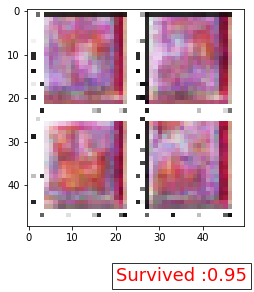

Survival pred [[0.9477185]]


In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('image (9).png', target_size=(50,50))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
print("For Model with adam optimiser")
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='Survived :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Death :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()
print("Survival pred",prediction)

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('image (9).png', target_size=(50,50))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
print("For Model with rmsprop optimiser")
prediction1 = model1.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction1[:,:]>0.5):
    value ='Survived :%1.2f'%(prediction1[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Death :%1.2f'%(1.0-prediction1[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()
print("Survival pred",prediction1)

In [ ]:
print('Survival pred')
prediction[:,:]

Survival pred


array([[0.9477185]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
test_image = image.load_img('a29.png', target_size = (50, 50))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
Y_pred = model.predict(test_image)
y_pred = np.argmax(Y_pred, axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(validation_generator.classes, y_pred))
#print('Classification Report')
#target_names = ['Death','Survived']
#print(classification_report(validation_generator.classes, y_pred, target_names=target_names))